# Numpy: acelerando operações sobre vetores

## Comparações: escrita e acesso

### Velocidade de escrita

O código a seguir gera 100 milhões de valores aleatórios entre 0 e 1 usando a biblioteca `random` do próprio Python. Os valores são guardados em uma lista.

In [31]:
SIZE = 100000000

In [32]:
from random import random

values = list()
for i in range(SIZE):
    values.append(random())

O mesmo é feito a seguir, usando o inicializador rand da biblioteca `numpy`

In [33]:
import numpy as np

values_np = np.random.rand(SIZE)

### Velocidade de acesso

As coisas pioram ainda mais quando estamos avaliando a velocidade de acesso a esses dados. Listas em Python não são otimizadas para armazenar os valores próximos um dos outros, logo, todo acesso feito é mais lento que o acesso feito a um _array_ do _NumPy_.

Por exemplo, calculando a soma de todos os valores gerados aleatoriamente.

In [34]:
sum = 0.
for v in values:
    sum += v
print(sum)

50000387.28184694


In [35]:
sum_np = np.sum(values_np)
print(sum_np)

50002051.79010808


E se quisermos tirar a mediana?

O código abaixo literalmente <span style="color:red">não roda no Notebook da Rub</span>. Tente, se quiser.

In [36]:
# values.sort()
# median = values[SIZE//2]

Numpy

In [37]:
median = np.median(values_np)
print(median)

0.5000228624311698


(O que faz sentido, pois estamos usando  uma distribuição uniforme entre 0 e 1)

Em suma, por operações sobre vetores, matrizes e outros tensores (generalização para dimensões superiores) serem muito lentas em Python, o _NumPy_ forma a base de todas as outras bibliotecas que fazem operações sobre essas estruturas. Talvez no caso do Camp isso não faça muita diferença, devido ao volume reduzido de dados (no mundo real, 100 milhões de valores é um número pequeno), mas, para fazer uso das funcionalidades, é necessário conhecer essa base.

# Scipy: um canivete suíço

A biblioteca Scipy pode ser usada para
- Tratamento de sinais
- Transformada de Fourier
- Resolução de equações diferenciais
- Álgebra linear
- Interpolação polinomial
- Estatística

dentre outras funcionalidades.

No nosso caso, iremos usar a mesma para gerar diferentes distribuições.

In [38]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## Distribuição uniforme

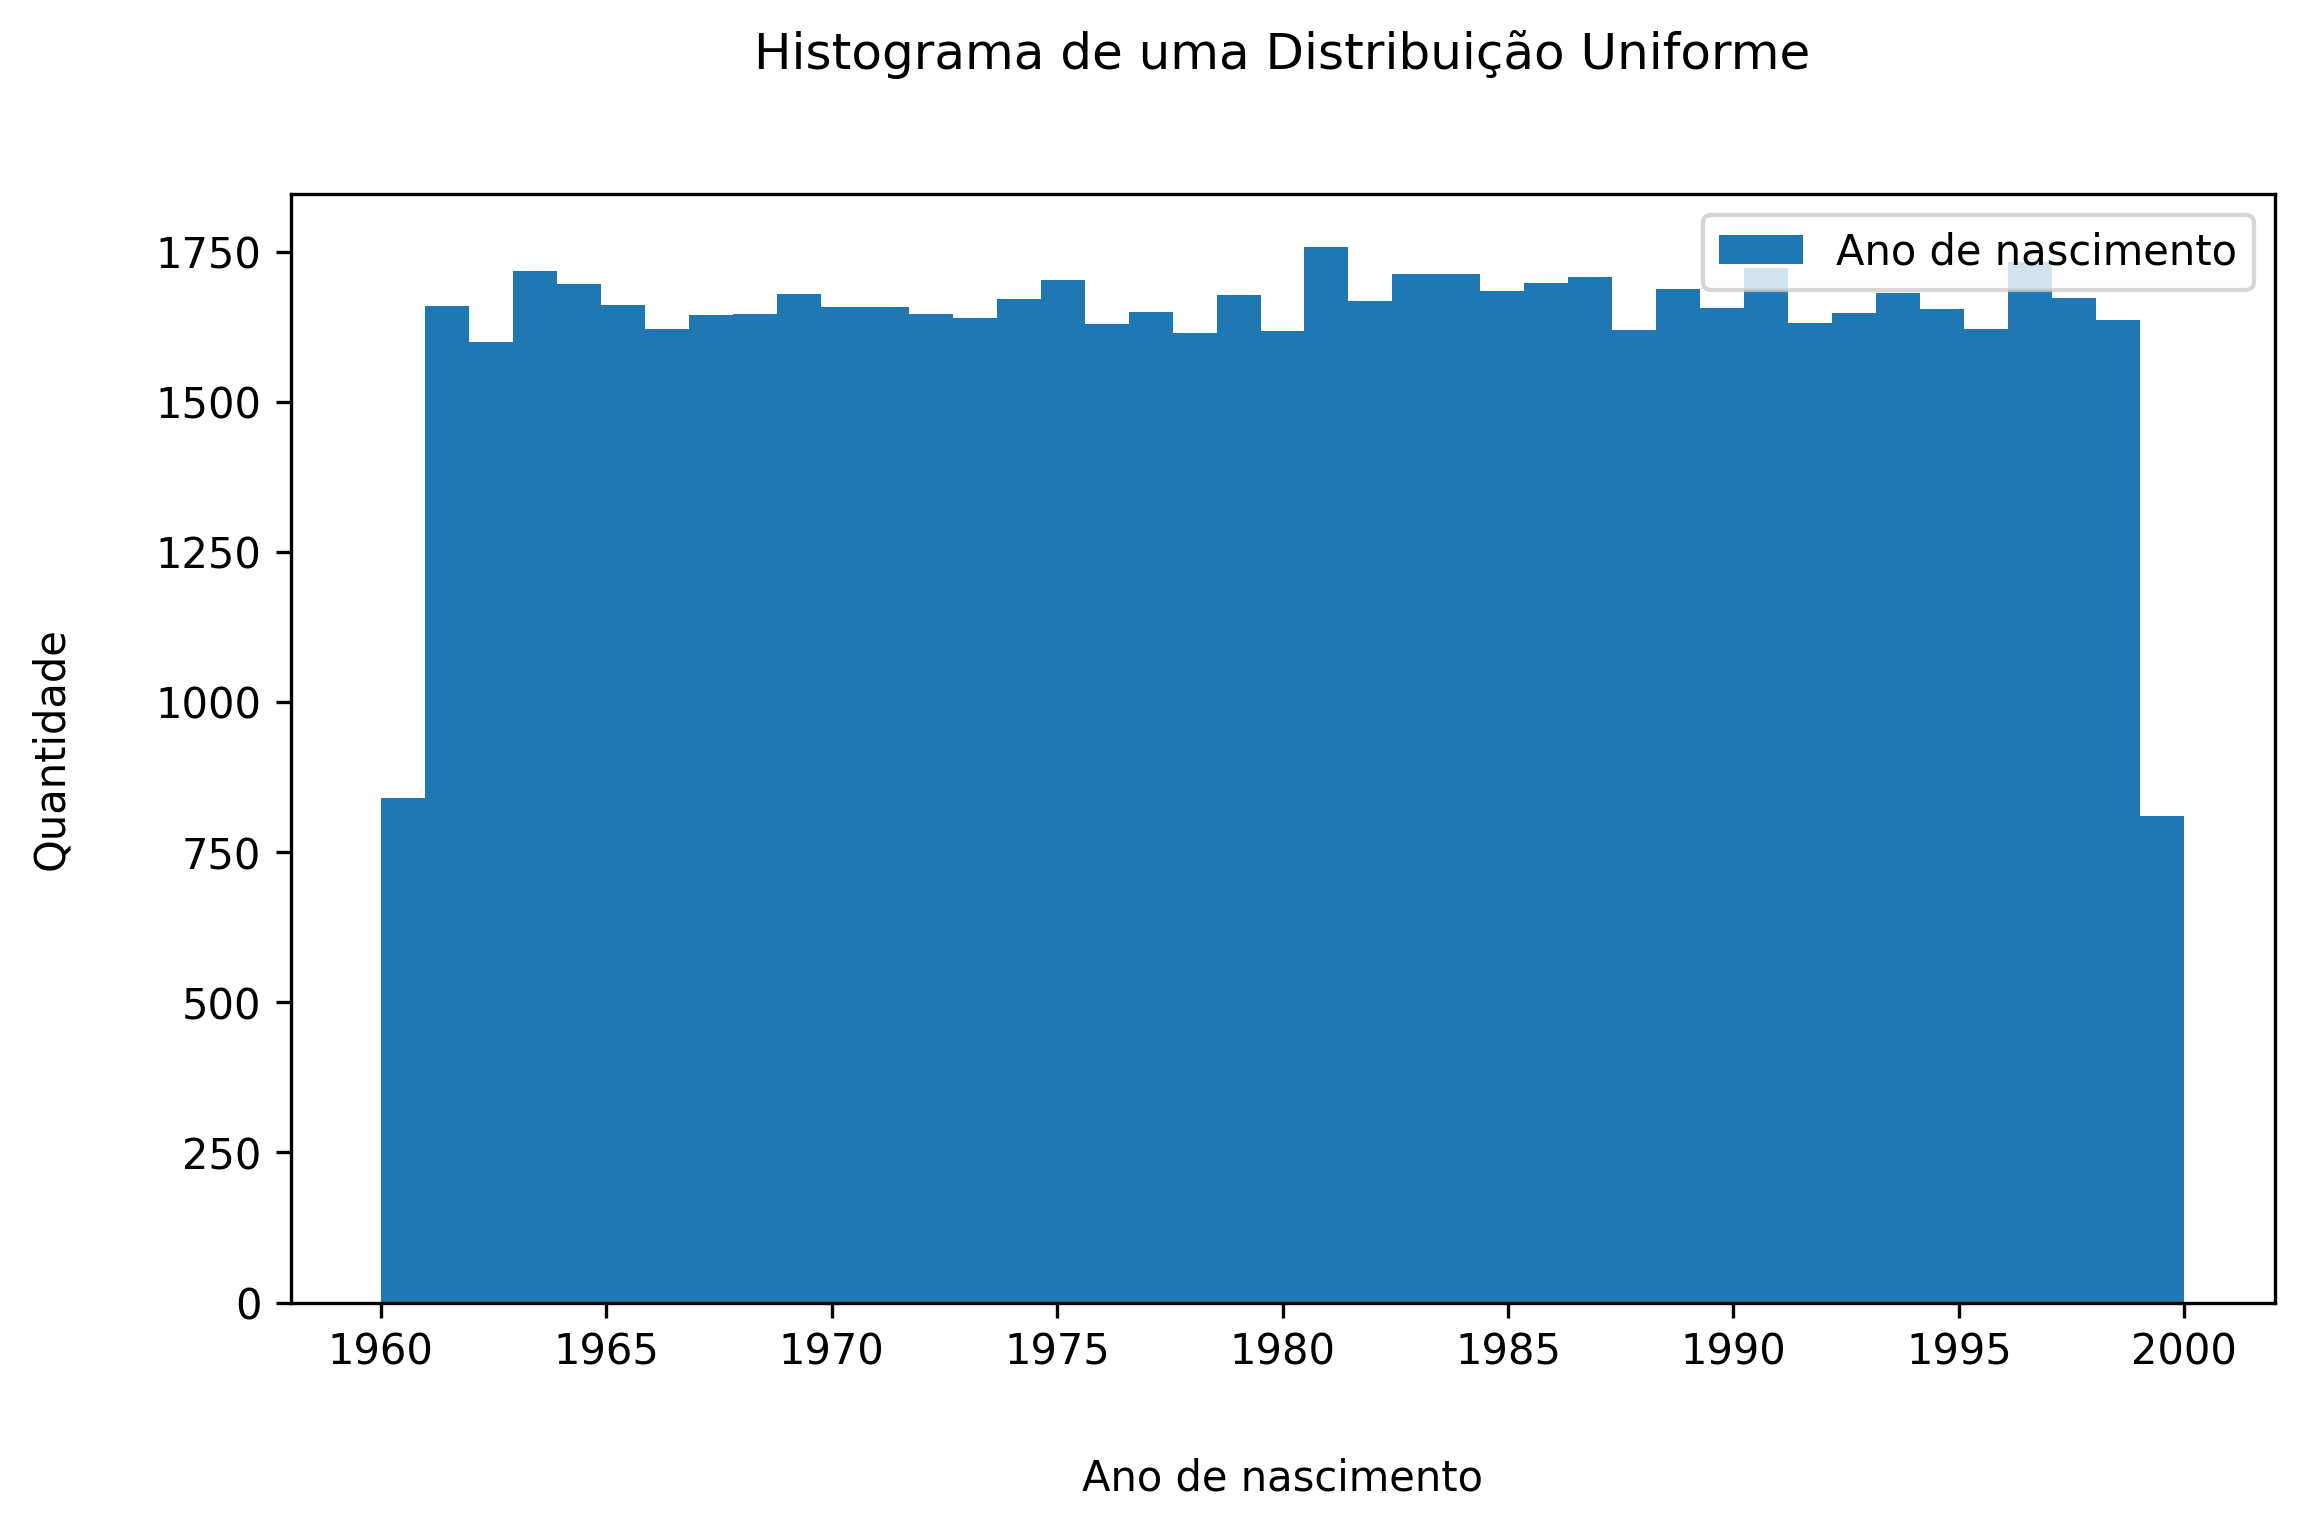

In [39]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

a = 1960
b = 2000
years = np.arange(a, b+1)
data = uniform.rvs(size=66666, loc=a, scale=b-a)
data = np.round(data)
w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
ax.hist(data, bins=len(years), label='Ano de nascimento')
ax.set_title('Histograma de uma Distribuição Uniforme', pad=30)
ax.set_xlabel('Ano de nascimento', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)
ax.legend(loc='upper right')
plt.show()
fig.savefig('uniform_hist.png', dpi=1000, transparent=True, bbox_inches="tight")

# Distribuição Normal

$$
f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

A fórmula parece complicada, mas o formato da distribuição normal é bem intuitivo:

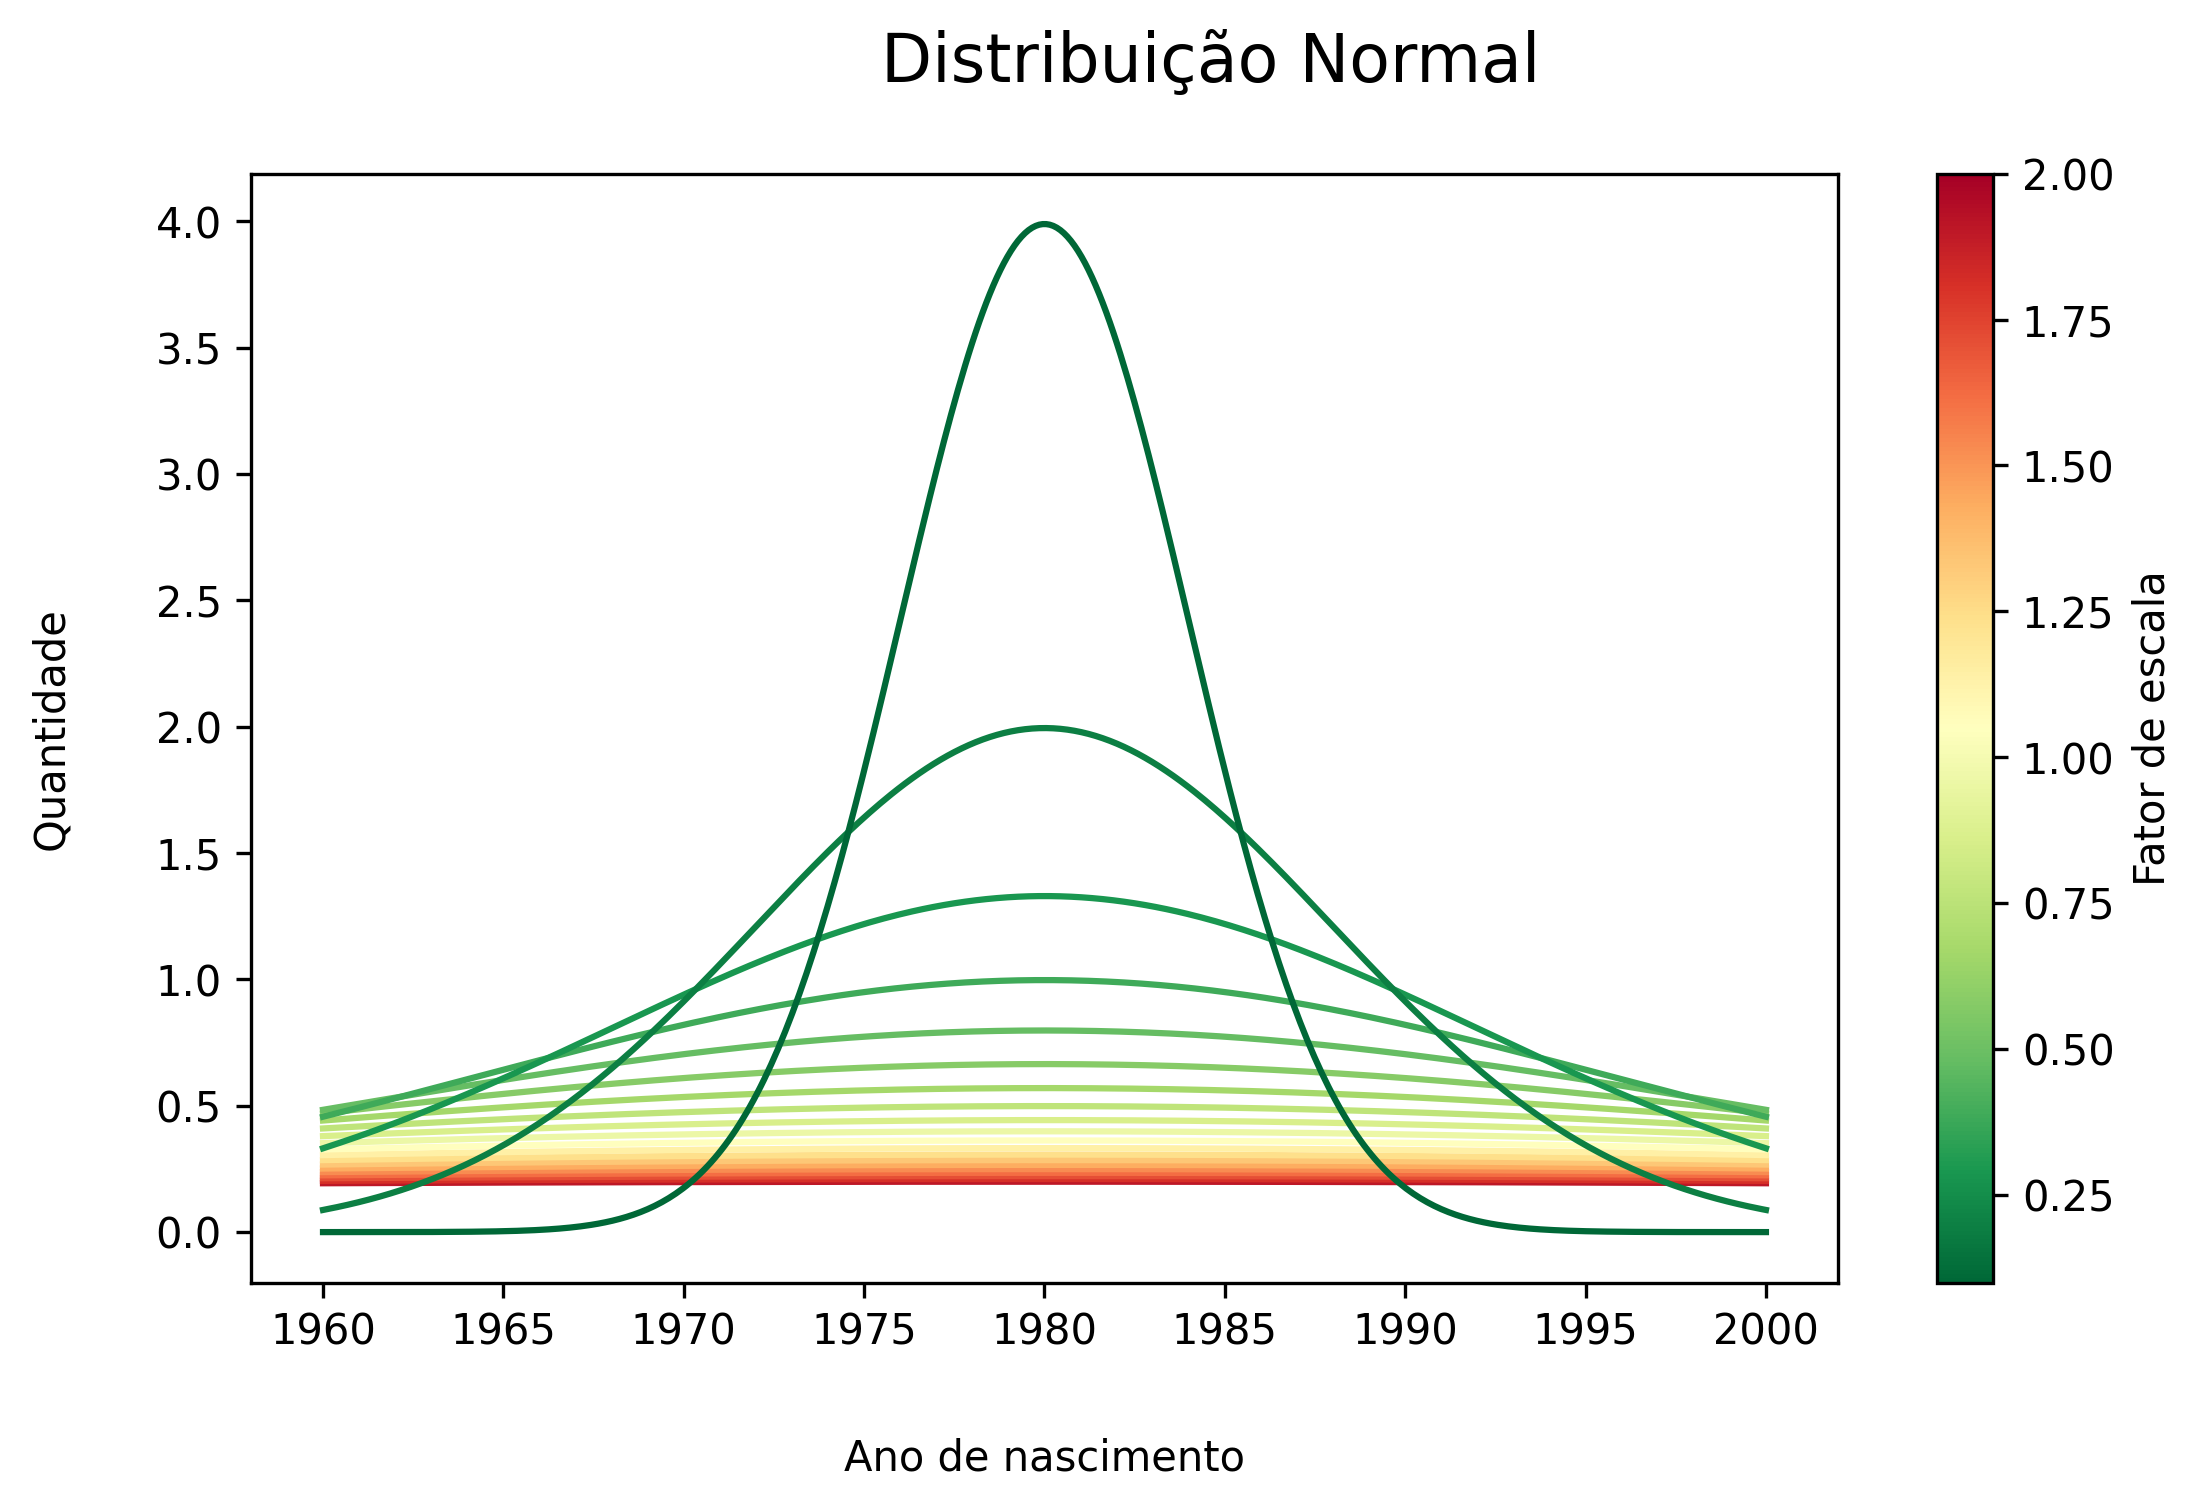

In [40]:
from scipy.stats import norm
from matplotlib.cm import ScalarMappable

x = np.linspace(0, 1, len(years) * 10)
years_smooth = np.linspace(1960, 2000, len(years) * 10)

scales = np.arange(0.1, 2.1, 0.1)

w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição Normal', fontsize=16)
color_map = plt.get_cmap('RdYlGn_r')

ax = fig.add_subplot(111)
ax.set_xlabel('Ano de nascimento', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)

for k, scale in reversed(list(enumerate(scales))):
    color = color_map(k / len(scales))
    weights = norm.pdf(x, loc=0.5, scale=scale)
    ax.plot(years_smooth, weights, color=color)

norm = plt.Normalize(scales.min(), scales.max())
scalar_mappable = ScalarMappable(cmap=color_map, norm=norm)
scalar_mappable.set_array([])
color_bar = plt.colorbar(scalar_mappable, ax=ax)
color_bar.set_label("Fator de escala")

plt.show()
fig.savefig('normal.png', dpi=1000, transparent=True, bbox_inches="tight")

Quanto maior a escala, mais "alargado" o gráfico se torna, diminuindo o tamanho do pico, e tornando as probabilidades mais iguais. Quando usamos escala = 1.0, obtemos a distribuição normal padrão. Apesar de já apresentar uma tendência quando comparada com a distribuição uniforme, a distribuição normal ainda é uma distribuição simétrica, com a média e a mediana iguais. Isso pode deixar na cara que os dados foram gerados usando algum método estatístico.

## Distribuição Alfa

$$
f(x,\alpha)=\frac{1}{x^2\phi(\alpha)\sqrt{2\pi}}*\exp\left(-\frac{1}{2}(\alpha-1/x)^2\right)
$$

Quê?

Calma. O que você precisa saber: essa distribuição tem um "pico" no seu início. O tamanho desse pico comparado com o restante da distribuição é determinado pelo parâmetro alfa $(\alpha)$. Vamos experimentar alguns valores diferentes.

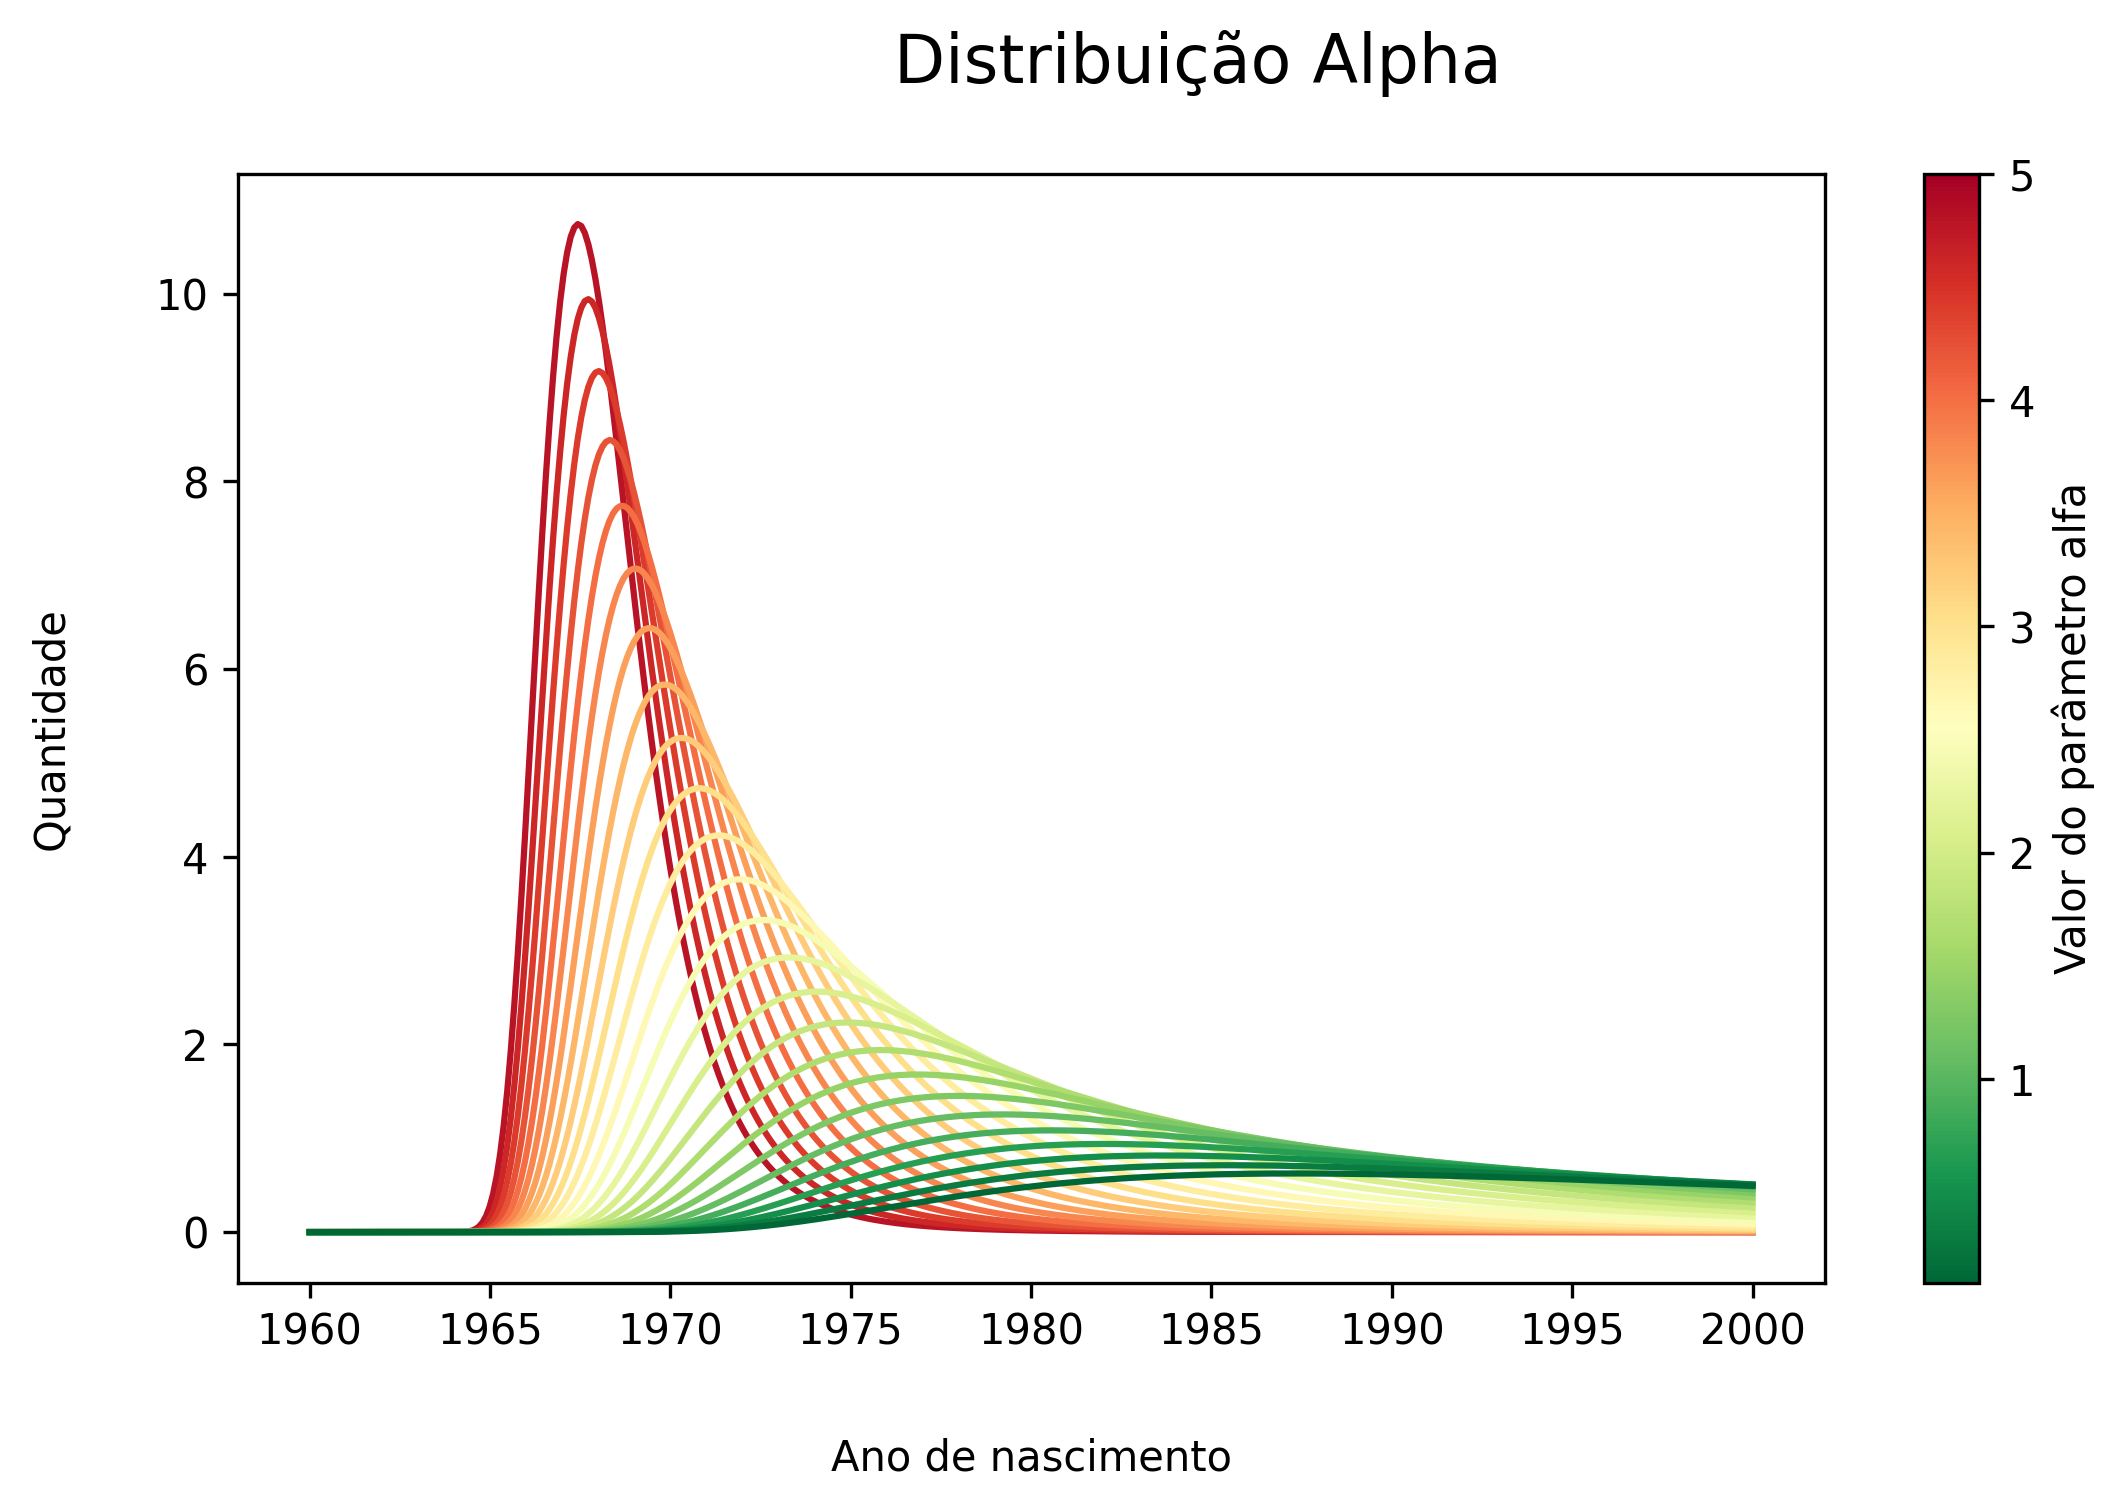

In [41]:
from scipy.stats import alpha
from matplotlib.cm import ScalarMappable

alphas = np.linspace(0.1, 5., 25)
x = np.linspace(0, 1, len(years) * 10)
years_smooth = np.linspace(1960, 2000, len(years) * 10)

w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição Alpha', fontsize=16)
color_map = plt.get_cmap('RdYlGn_r')

ax = fig.add_subplot(111)
ax.set_xlabel('Ano de nascimento', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)

for k, a in reversed(list(enumerate(alphas))):
    color = color_map(k / len(alphas))
    weights = alpha.pdf(x, a)
    ax.plot(years_smooth, weights, color=color)

norm = plt.Normalize(alphas.min(), alphas.max())
scalar_mappable = ScalarMappable(cmap=color_map, norm=norm)
scalar_mappable.set_array([])
color_bar = plt.colorbar(scalar_mappable, ax=ax)
color_bar.set_label("Valor do parâmetro alfa")

plt.savefig('alpha.png', dpi=1000, transparent=True, bbox_inches="tight")

## Distribuição Exponencial

$$
f(x)=\exp(-x)
$$

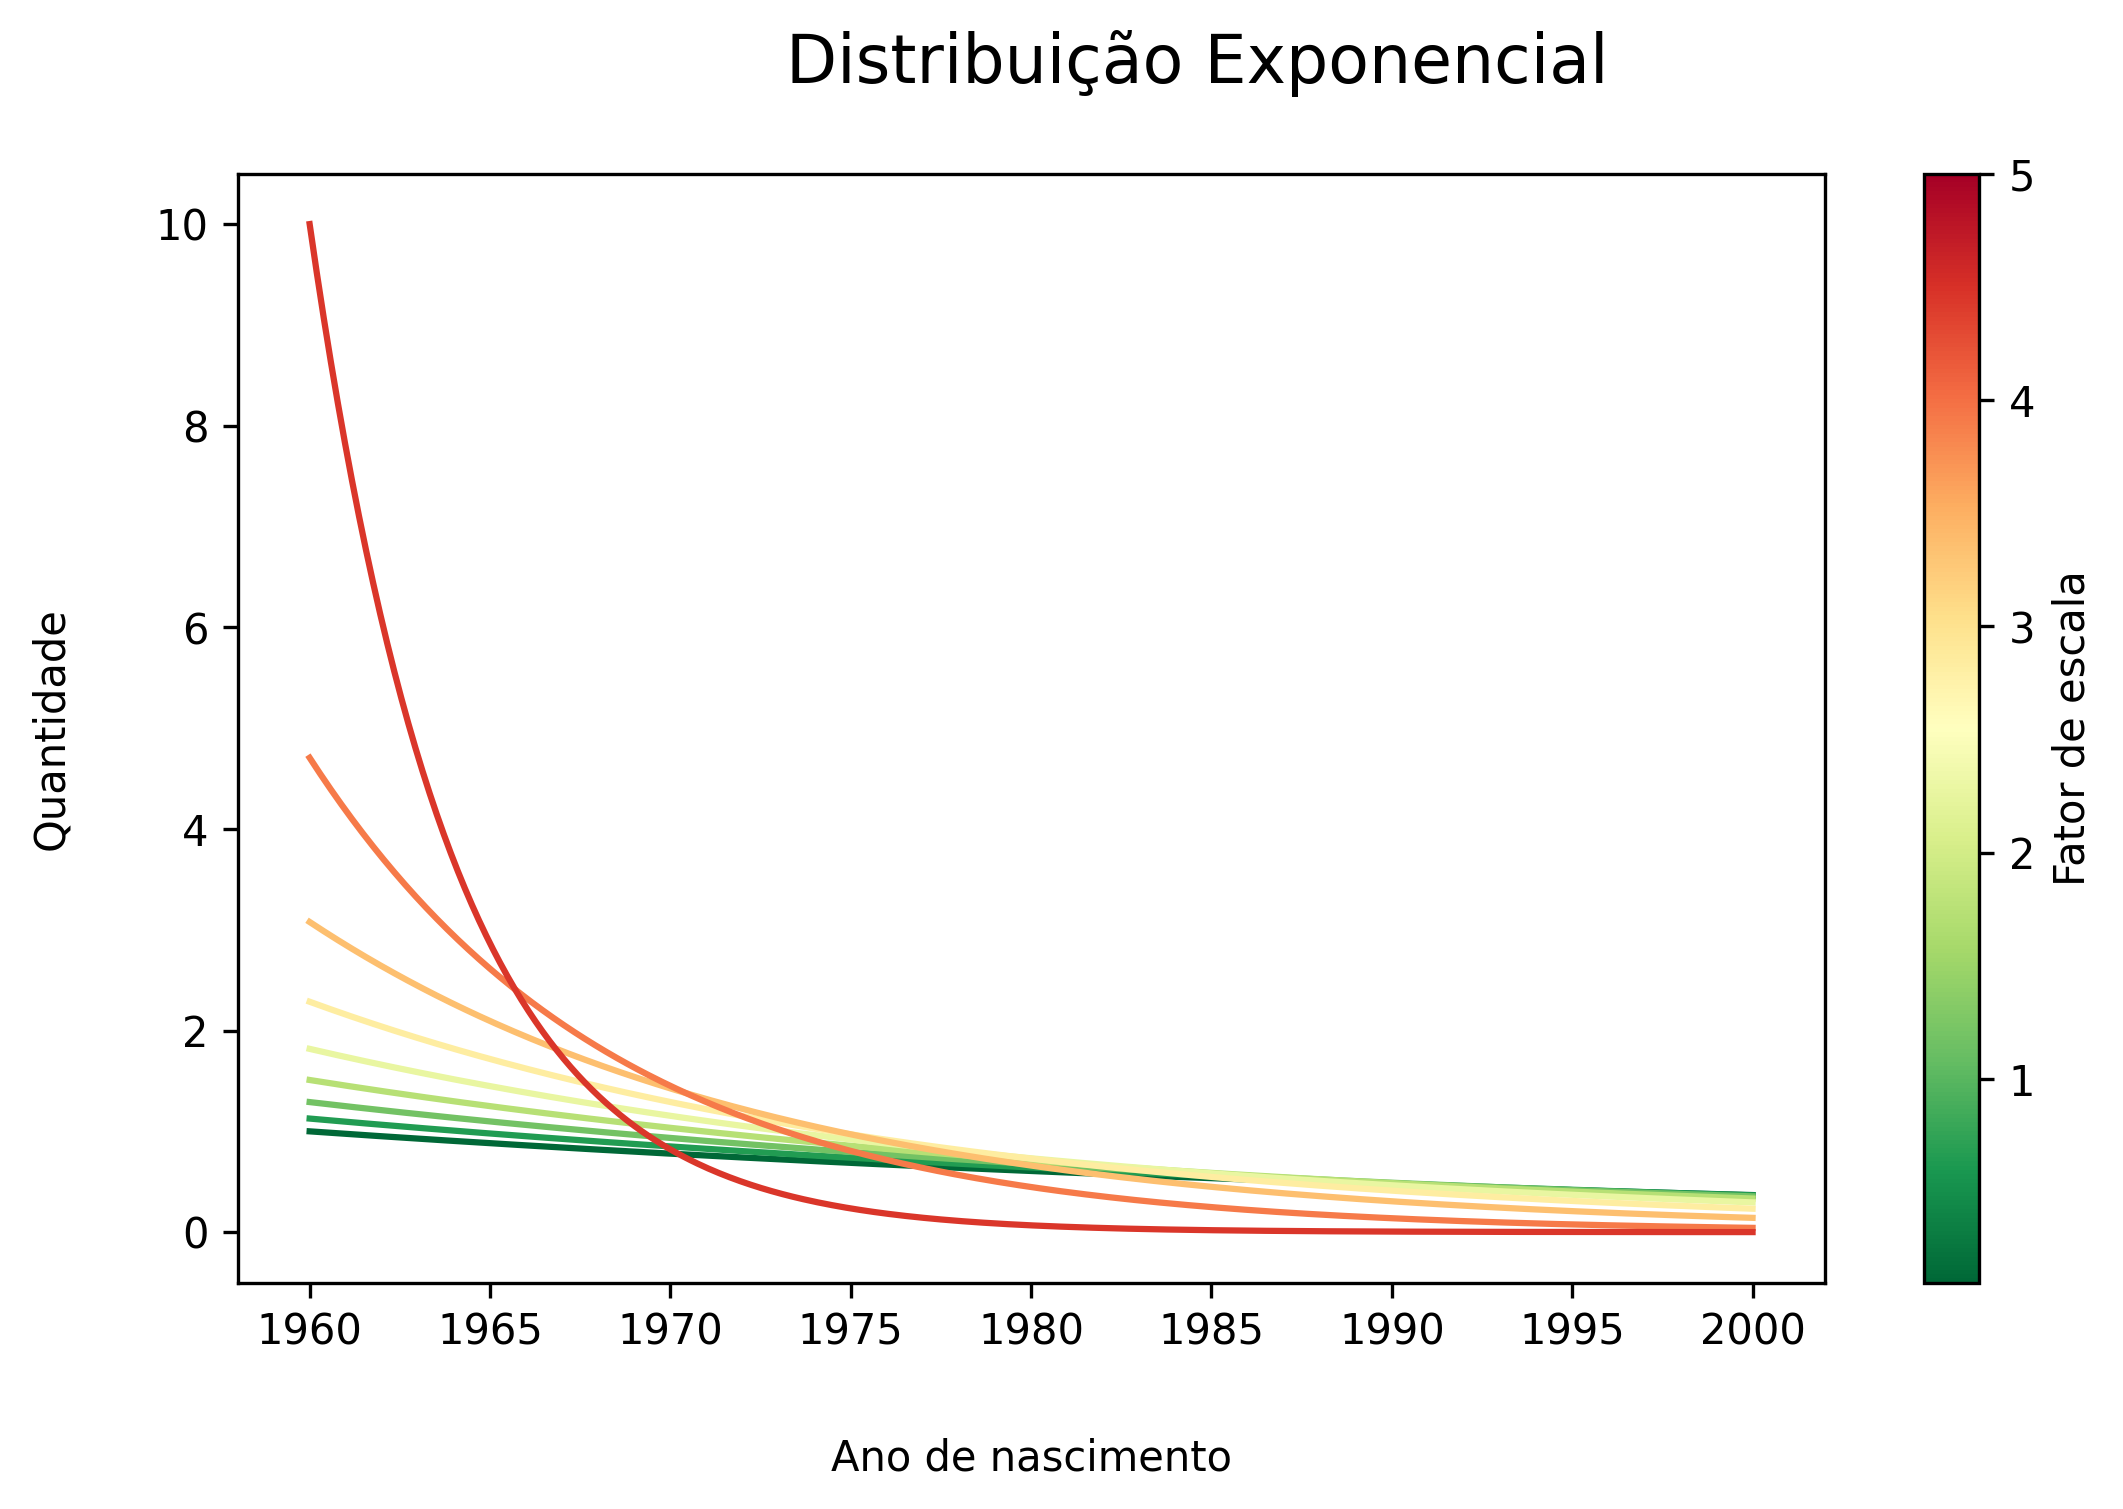

In [42]:
from scipy.stats import expon

scales = np.linspace(1, 0.1, 9)

fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição Exponencial', fontsize=16)

ax = fig.add_subplot(111)
ax.set_xlabel('Ano de nascimento', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)

for k, scale in enumerate(scales):
    color = color_map(k / len(scales))
    weights = expon.pdf(x, loc=0, scale=scale)
    ax.plot(years_smooth, weights, color=color)

norm = plt.Normalize(alphas.min(), alphas.max())
scalar_mappable = ScalarMappable(cmap=color_map, norm=norm)
scalar_mappable.set_array([])
color_bar = plt.colorbar(scalar_mappable, ax=ax)
color_bar.set_label("Fator de escala")

plt.show()
fig.savefig('expon.png', dpi=1000, transparent=True, bbox_inches="tight")

Quando forçamos que a curva tenha sua escala alterada, também mudamos seu formato. Note que o valor do pico também é alterado.

## Adicionando ruído

Todos as distribuições de probabilidade que vimos até agora são geradas a partir de uma equação bem-definida. No mundo real, entretanto, é mais comum que os dados sejam gerados a partir de um processo estocástico, ou seja, um processo que envolve aleatoriedade. Para simular esse ruído, iremos usar um ruído gerado a partir de uma distribuição uniforme. Como exemplo, usaremos uma distribuição alfa qualquer.

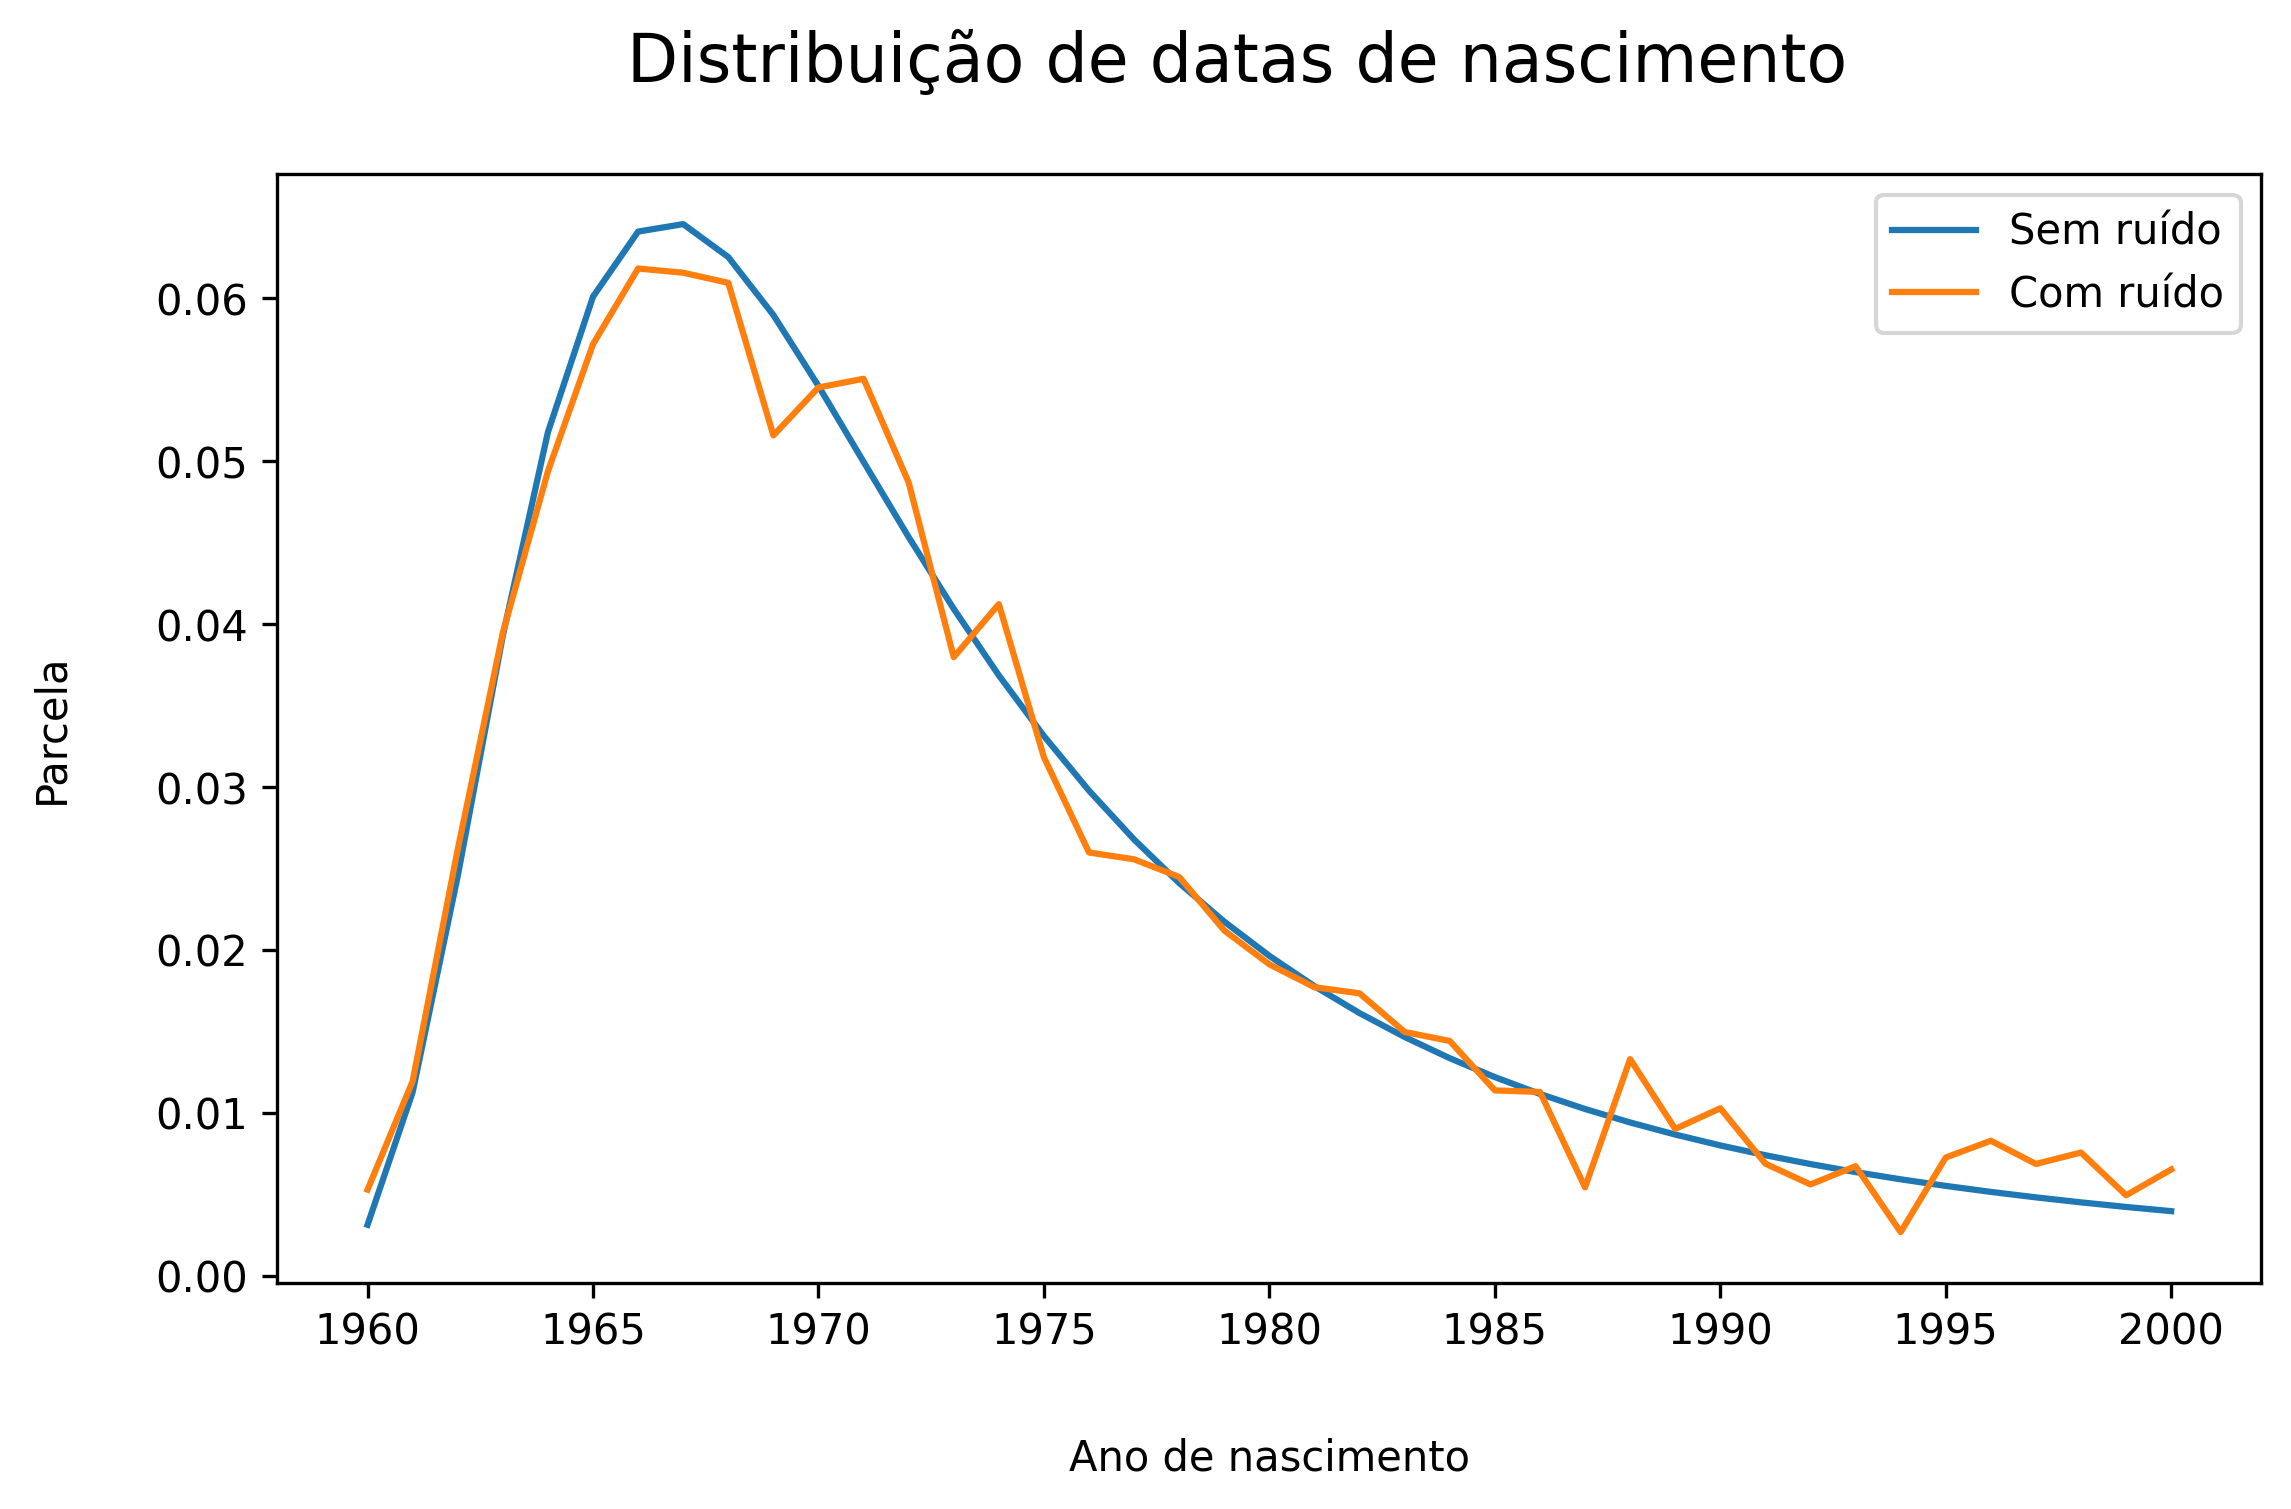

In [43]:
fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição de datas de nascimento', fontsize=16)

ax = fig.add_subplot(111)
ax.set_xlabel('Ano de nascimento', labelpad=20)
ax.set_ylabel('Parcela', labelpad=20)

x = np.linspace(0, 1, len(years))

weights = alpha.pdf(x, loc=-0.2, a=2)
weights = weights/weights.sum()
ax.plot(years, weights, label='Sem ruído')

# Gerando ruído aleatório
new_weights = weights + np.random.normal(0, 0.0025, len(weights))
new_weights = new_weights/new_weights.sum()
ax.plot(years, new_weights, label=f'Com ruído')

plt.legend()
plt.show()
fig.savefig('noise.png', dpi=1000, transparent=True, bbox_inches="tight")

Esse gráfico parece um pouco mais "verdadeiro" por conta de suas imperfeições.

## Usando pesos para escolher um valor

Gráficos de distribuição de probabilidades são úteis, mas, como vamos ver mais adiante, precisamos escolher um valor aleatório usando essa distribuição para incluí-los em nossos registros armazenados em CSV. Para fazer isso, usaremos a função `choice` da biblioteca `numpy`. Para isso, vamos usar a última distribuição gerada.

In [44]:
# Gerando 66666 anos de nascimento aleatórios
random_choice = np.random.choice(years, size=66666, p=weights)

O problema que obtivemos está relacionado aos valores da distribuição. Os valores de uma PDF precisam ser normalizados antes de serem usados para escolher um valor aleatório. Isso é feito para que a soma de todas as probabilidades seja igual a 1.0. Para resolver esse problema, basta dividir o vetor de pesos pela sua soma.

Valores gerados: [1966 1965 1962 ... 1971 1976 1963]


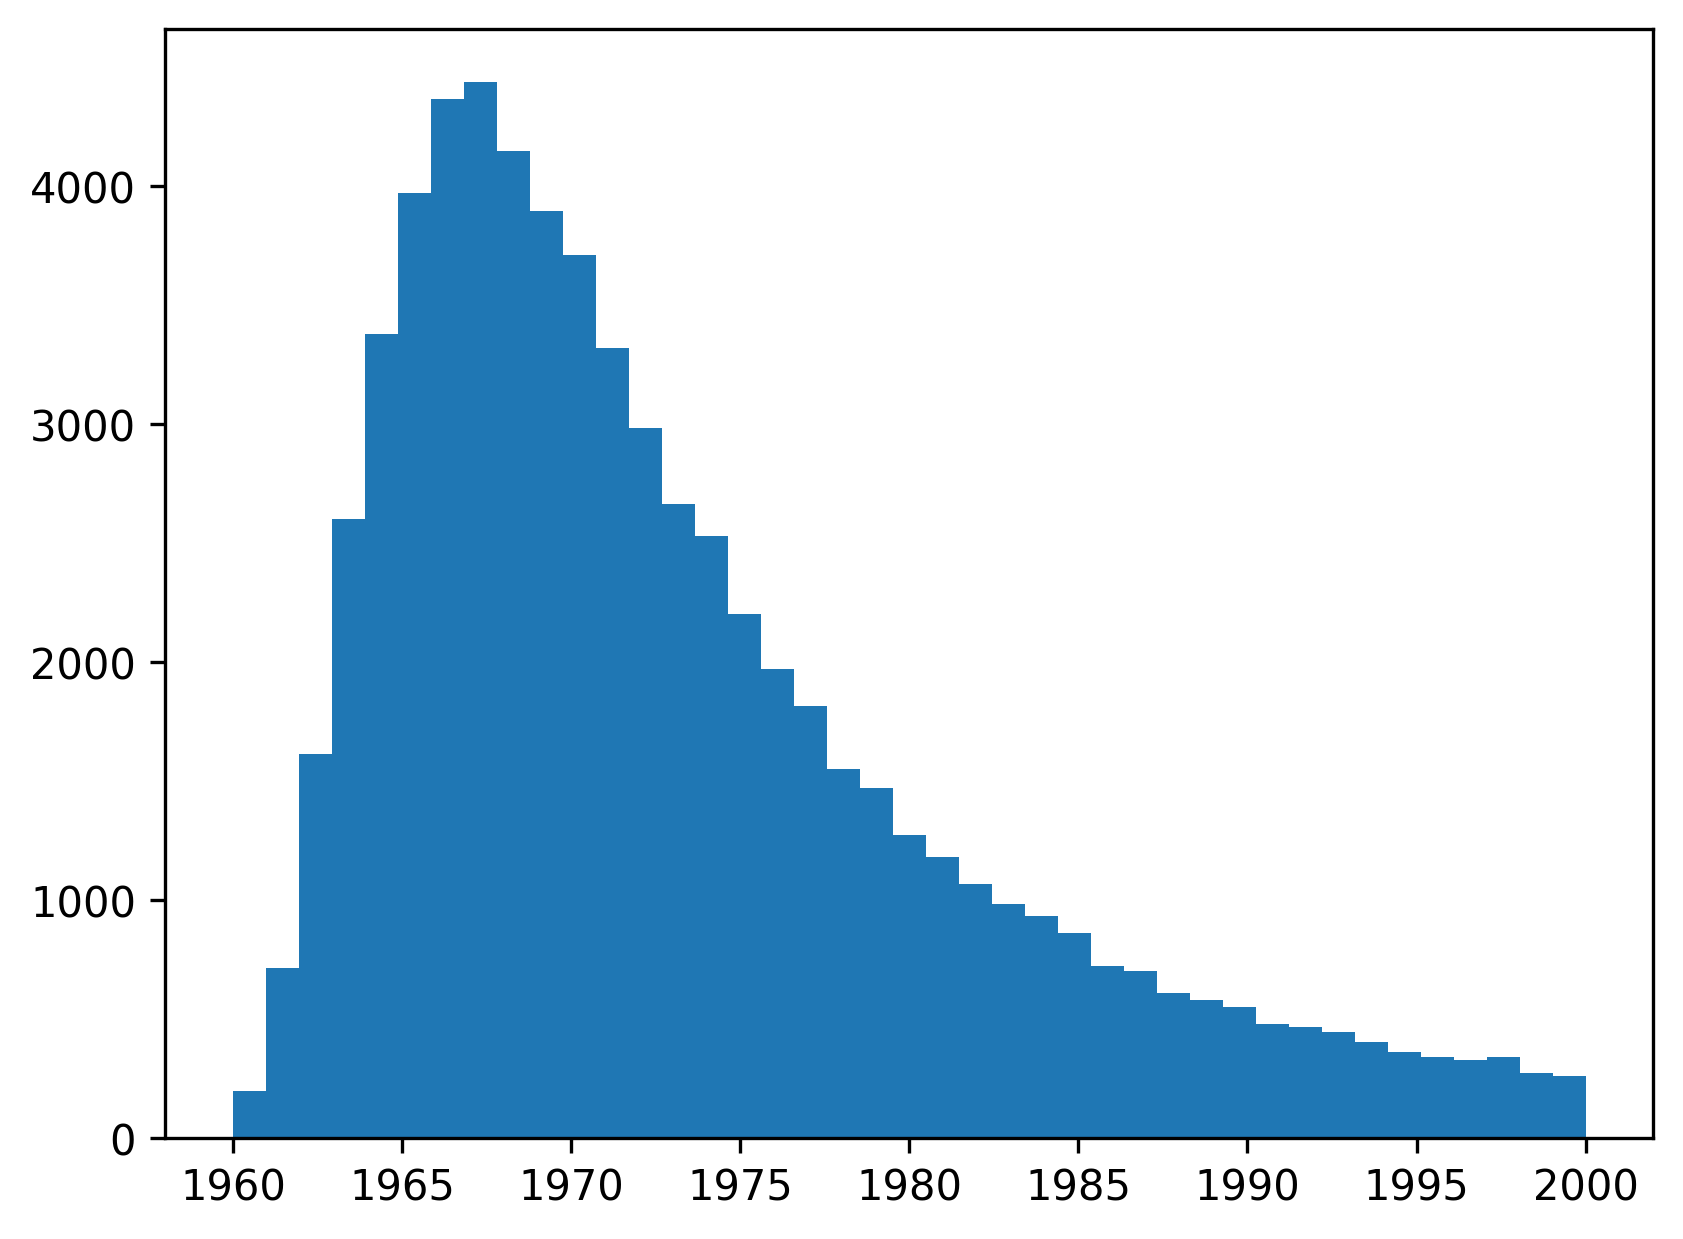

In [45]:
weights_normalized = weights / weights.sum()
random_choice = np.random.choice(years, size=66666, p=weights_normalized)
print("Valores gerados:", random_choice)
plt.hist(random_choice, bins=len(years))
plt.show()

Como podemos ver, escolhemos 10 anos aleatórios, e a grande maioria deles se encontram no período que data do fim da década de 60 e durante a década de 70, que é o período que a distribuição alfa tem seu pico. Dessa forma, aprendemos a gerar um array de valores, que iremos usar mais para frente na manipulação de CSVs.

# Pandas

## Criação de DataFrame

In [46]:
import pandas as pd
import faker

fake = faker.Faker()
faker.Faker.seed(42)

# Empty columns: 'Date of birth', 'Registration date'
birthday_df = pd.DataFrame(columns=['Date of birth', 'Registration date'])
display(birthday_df)

,Date of birth,Registration date


Note que não temos nenhum valor registrado ainda. Vamos gerar 66666 datas de nascimento aleatórias e as datas de registro. Vamos supor que todas as pessoas se registraram no ano de 2023.

As datas de nascimento serão geradas após decidir o ano, isso é feito para aproveitar a distribuição gerada anteriormente. Se gerarmos essa data de nascimento usando o Faker, o mesmo irá usar uma outra distribuição. Como queremos evitar o uso de loops ao máximo, iremos vetorizar uma função que decide a data com base no ano.

In [47]:
from datetime import date

years_of_birth = np.random.choice(years, size=66666, p=weights_normalized)
def decide_date_of_birth(year: int):
    start_date = date(year, 1, 1)
    end_date = date(year, 12, 31)
    return fake.date_between(start_date=start_date, end_date=end_date)
decide_date_of_birth_vectorized = np.vectorize(decide_date_of_birth)
dates_of_birth = decide_date_of_birth_vectorized(years_of_birth)
print("Datas de nascimento:", dates_of_birth)

# Agora, vamos gerar 66666 datas de registro
def decide_registration_date(_):
    start_date = date(2023, 1, 1)
    end_date = date(2023, 12, 31)
    return fake.date_between(start_date=start_date, end_date=end_date)
decide_registration_date_vectorized = np.vectorize(decide_registration_date)
dates_of_registration = decide_registration_date_vectorized(np.arange(66666))
print("Datas de registro:", dates_of_registration)

# Preenchendo o DataFrame com esses dois arrays
birthday_df['Date of birth'] = dates_of_birth
birthday_df['Registration date'] = dates_of_registration
display(birthday_df)

Datas de nascimento: [datetime.date(1969, 1, 10) datetime.date(1965, 4, 11)
 datetime.date(2000, 3, 22) ... datetime.date(1966, 6, 5)
 datetime.date(1962, 5, 21) datetime.date(1965, 8, 6)]
Datas de registro: [datetime.date(2023, 3, 11) datetime.date(2023, 7, 28)
 datetime.date(2023, 1, 9) ... datetime.date(2023, 12, 17)
 datetime.date(2023, 1, 18) datetime.date(2023, 8, 18)]


,Date of birth,Registration date
0,1969-01-10,2023-03-11
1,1965-04-11,2023-07-28
2,2000-03-22,2023-01-09
3,1962-09-26,2023-12-16
4,1965-09-04,2023-02-23
...,...,...
66661,1972-10-18,2023-06-27
66662,1984-11-14,2023-07-19
66663,1966-06-05,2023-12-17
66664,1962-05-21,2023-01-18


Para demonstrar a diferença na distribuição das datas de nascimento e datas de registro, basta olhar para os histogramas.

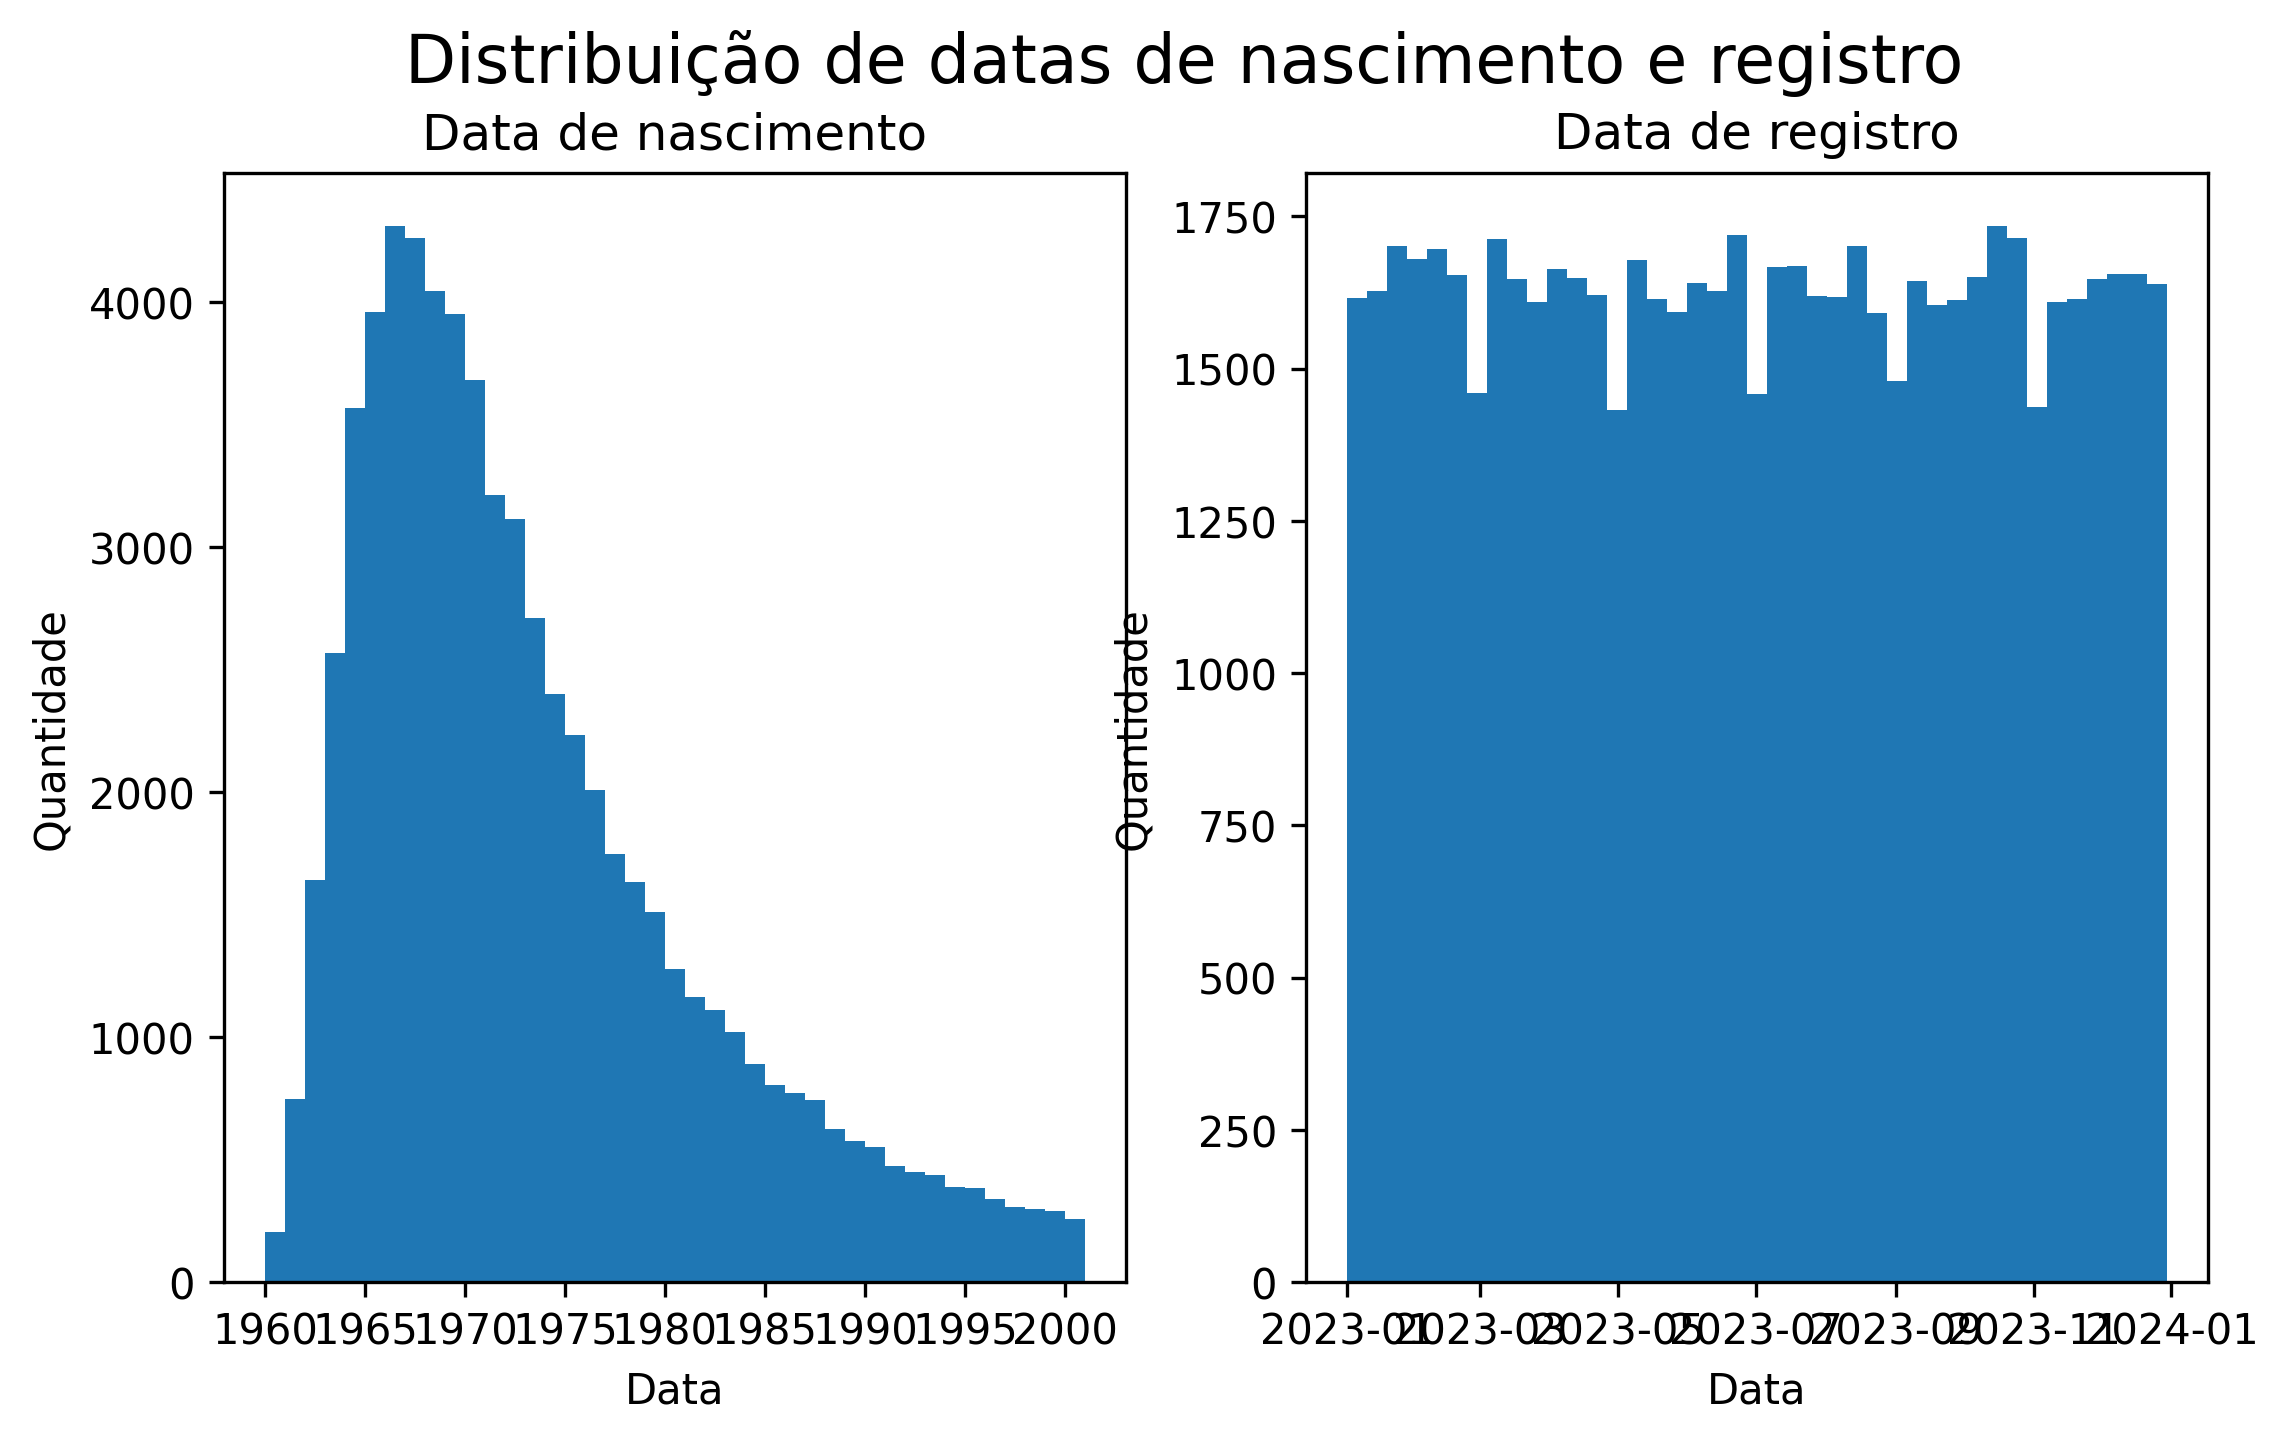

In [48]:
# 2 column plot
fig, ax = plt.subplots(1, 2, figsize=(w,h))
fig.suptitle('Distribuição de datas de nascimento e registro', fontsize=16)
ax[0].hist(dates_of_birth, bins=len(years))
ax[0].set_title('Data de nascimento')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Quantidade')
ax[1].hist(dates_of_registration, bins=len(years))
ax[1].set_title('Data de registro')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Quantidade')
plt.show()

## Carregando CSV da internet

In [62]:
dataframe = pd.read_csv(
    "http://blog.mds.gov.br/redesuas/wp-content/uploads/2018/06/Lista_Munic%C3%ADpios_com_IBGE_Brasil_Versao_CSV.csv",
    sep=";",
    encoding="latin1")

display(dataframe)


df_transactions.to_csv('transacoes.csv', index=False)


,ConcatUF+Mun,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,Unnamed: 9
0,ROAlta Floresta D'oeste,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,PROCV(A2;'[Lista de Municípios com IBGE - Bras...
1,ROAriquemes,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,PROCV(A2;'Lista de Municípios IBGE'!$A$2:$G$55...
2,ROCabixi,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,NaN
3,ROCacoal,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,NaN
4,ROCerejeiras,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5565,GOVianópolis,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,NaN
5566,GOVicentinópolis,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,NaN
5567,GOVila Boa,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,NaN
5568,GOVila Propício,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,NaN


## Operações

### Colunas

Vamos deletar 2 colunas do DataFrame: ConcatUF+Mun e Unnamed: 9

Podemos fazer isso de duas maneiras:
- Inplace, não recomendado (se você errar, todas as informações são perdidas)
- Gerando um novo DataFrame (recomendado)

In [50]:
# Para demonstrar o inplace, vou gerar um novo
dataframe_copy = dataframe.copy()
dataframe_copy.drop(columns=['ConcatUF+Mun', 'Unnamed: 9'], inplace=True)
display(dataframe_copy)

# Ou, faça isso direto, apenas sem usar o inplace=True
dataframe_copy = dataframe.drop(columns=['ConcatUF+Mun', 'Unnamed: 9'])
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN
...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN


,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN
...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN


### Adicionar coluna

A adição de uma coluna pode ser feita de várias formas. Podemos adicionar valores constantes, calcular algum valor a partir de outras colunas, adicionar valores vazios, etc.

1. Coluna com valores constantes

In [51]:
dataframe_copy['País'] = 'Brasil'
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,Brasil
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,Brasil
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,Brasil
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,Brasil
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,Brasil
...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,Brasil
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,Brasil
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,Brasil
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,Brasil


2. Valor calculado

In [52]:
total_pop = dataframe_copy['População 2010'].sum()
dataframe_copy['Porcentagem'] = dataframe_copy['População 2010'] / total_pop
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,Brasil,0.000128
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,Brasil,0.000474
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,Brasil,0.000033
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,Brasil,0.000412
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,Brasil,0.000089
...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,Brasil,0.000066
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,Brasil,0.000039
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,Brasil,0.000025
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,Brasil,0.000027


3. Coluna com valores vazios

In [53]:
# column with empty values at dataframe_copy
dataframe_copy['Vazia'] = None
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem,Vazia
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,Brasil,0.000128,None
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,Brasil,0.000474,None
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,Brasil,0.000033,None
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,Brasil,0.000412,None
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,Brasil,0.000089,None
...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,Brasil,0.000066,None
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,Brasil,0.000039,None
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,Brasil,0.000025,None
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,Brasil,0.000027,None


4. Removendo coluna

In [54]:
dataframe_copy = dataframe_copy.drop(columns=['Vazia'])
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,Brasil,0.000128
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,Brasil,0.000474
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,Brasil,0.000033
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,Brasil,0.000412
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,Brasil,0.000089
...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,Brasil,0.000066
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,Brasil,0.000039
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,Brasil,0.000025
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,Brasil,0.000027


## Linhas

1. Adicionar linha usando .loc

In [55]:
dataframe_copy.loc[len(dataframe_copy)] = ['999999', '9999999', 'SP', 'Rublandia', 'Região Sudeste', 1000000, 'Gigante', 'Capital', 'Brasil', 0.1]
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,Brasil,0.000128
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,Brasil,0.000474
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,Brasil,0.000033
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,Brasil,0.000412
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,Brasil,0.000089
...,...,...,...,...,...,...,...,...,...,...
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,Brasil,0.000039
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,Brasil,0.000025
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,Brasil,0.000027
5569,530010,5300108,DF,Brasília,Região Centro-Oeste,2570160.0,Metrópole,Capital,Brasil,0.013474


2. Remover usando .drop

In [56]:
dataframe_copy = dataframe_copy.drop(index=len(dataframe_copy) - 1)
display(dataframe_copy)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,Brasil,0.000128
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,Brasil,0.000474
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,Brasil,0.000033
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,Brasil,0.000412
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,Brasil,0.000089
...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,Brasil,0.000066
5566,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,Brasil,0.000039
5567,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,Brasil,0.000025
5568,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,Brasil,0.000027


3. Selecionando linhas que satisfazem uma _query_ (SQL pero no mucho)

In [57]:
queried_df = dataframe_copy.query("UF == 'SP'")
display(queried_df)
queried_df = dataframe_copy[dataframe_copy['UF'] == 'SP']
display(queried_df)

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem
3267,350010,3500105,SP,Adamantina,Região Sudeste,33797.0,Pequeno II,NaN,Brasil,0.000177
3268,350020,3500204,SP,Adolfo,Região Sudeste,3557.0,Pequeno I,NaN,Brasil,0.000019
3269,350030,3500303,SP,Aguaí,Região Sudeste,32148.0,Pequeno II,NaN,Brasil,0.000169
3270,350040,3500402,SP,Águas da Prata,Região Sudeste,7584.0,Pequeno I,NaN,Brasil,0.000040
3271,350050,3500501,SP,Águas de Lindóia,Região Sudeste,17266.0,Pequeno I,NaN,Brasil,0.000091
...,...,...,...,...,...,...,...,...,...,...
3907,355700,3557006,SP,Votorantim,Região Sudeste,108809.0,Grande,NaN,Brasil,0.000570
3908,355710,3557105,SP,Votuporanga,Região Sudeste,84692.0,Médio,NaN,Brasil,0.000444
3909,355715,3557154,SP,Zacarias,Região Sudeste,2335.0,Pequeno I,NaN,Brasil,0.000012
3910,355720,3557204,SP,Chavantes,Região Sudeste,12114.0,Pequeno I,NaN,Brasil,0.000064


,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,País,Porcentagem
3267,350010,3500105,SP,Adamantina,Região Sudeste,33797.0,Pequeno II,NaN,Brasil,0.000177
3268,350020,3500204,SP,Adolfo,Região Sudeste,3557.0,Pequeno I,NaN,Brasil,0.000019
3269,350030,3500303,SP,Aguaí,Região Sudeste,32148.0,Pequeno II,NaN,Brasil,0.000169
3270,350040,3500402,SP,Águas da Prata,Região Sudeste,7584.0,Pequeno I,NaN,Brasil,0.000040
3271,350050,3500501,SP,Águas de Lindóia,Região Sudeste,17266.0,Pequeno I,NaN,Brasil,0.000091
...,...,...,...,...,...,...,...,...,...,...
3907,355700,3557006,SP,Votorantim,Região Sudeste,108809.0,Grande,NaN,Brasil,0.000570
3908,355710,3557105,SP,Votuporanga,Região Sudeste,84692.0,Médio,NaN,Brasil,0.000444
3909,355715,3557154,SP,Zacarias,Região Sudeste,2335.0,Pequeno I,NaN,Brasil,0.000012
3910,355720,3557204,SP,Chavantes,Região Sudeste,12114.0,Pequeno I,NaN,Brasil,0.000064


# Técnicas de otimização para o Looker Studio

# 1. Pré-calculando valores

Ao invés de calcular a idade a partir da data de nascimento no _Looker Studio_, por que não fazer isso localmente?

In [58]:
PRESENTATION_DATE = date(2024, 1, 7)
birthday_df['Age'] = birthday_df['Date of birth'].apply(lambda x: (PRESENTATION_DATE - x).days // 365)
display(birthday_df)

,Date of birth,Registration date,Age
0,1969-01-10,2023-03-11,55
1,1965-04-11,2023-07-28,58
2,2000-03-22,2023-01-09,23
3,1962-09-26,2023-12-16,61
4,1965-09-04,2023-02-23,58
...,...,...,...
66661,1972-10-18,2023-06-27,51
66662,1984-11-14,2023-07-19,39
66663,1966-06-05,2023-12-17,57
66664,1962-05-21,2023-01-18,61


# 2. Join

Uma operação ainda mais custosa que podemos fazer localmente é fazer JOIN de tabelas com informações relacionadas. Vamos supor que temos uma tabela contendo a informação de endereço dos 66666 usuários citados acima.

In [59]:
df_nan_dropped = dataframe_copy.dropna()
weights_address = df_nan_dropped['Porcentagem']
weights_address = weights_address / weights_address.sum()
user_addresses = np.random.choice(df_nan_dropped['Município'], size=66666, p=weights_address)
user_addresses = pd.DataFrame(user_addresses, columns=['Município'])
display(user_addresses)

# Fazendo o merge
birthday_df = pd.merge(birthday_df, user_addresses, left_index=True, right_index=True)
display(birthday_df)

,Município
0,Salvador
1,João Pessoa
2,Salvador
3,São Paulo
4,São Paulo
...,...
66661,Porto Alegre
66662,Palmas
66663,Rio de Janeiro
66664,Rio de Janeiro


,Date of birth,Registration date,Age,Município
0,1969-01-10,2023-03-11,55,Salvador
1,1965-04-11,2023-07-28,58,João Pessoa
2,2000-03-22,2023-01-09,23,Salvador
3,1962-09-26,2023-12-16,61,São Paulo
4,1965-09-04,2023-02-23,58,São Paulo
...,...,...,...,...
66661,1972-10-18,2023-06-27,51,Porto Alegre
66662,1984-11-14,2023-07-19,39,Palmas
66663,1966-06-05,2023-12-17,57,Rio de Janeiro
66664,1962-05-21,2023-01-18,61,Rio de Janeiro


## 2.1 Cuidado com o tipo de índice usado!

Em um ambiente em que dados são preciosos, utilizar UUIDs faz todo o sentido. No entanto, aqui estamos tratando de dados anonimizados, e, portanto, podemos usar um índice sequencial. Isso é mais rápido, pois a busca por um índice sequencial é muito mais rápida que a busca por um UUID. Da mesma forma, não use um índice como coluna, pois o Pandas oferece uma estrutura de dados otimizada para isso.

## 2.2 Cuidado com dados inúteis

No banco de dados, é necessário guardar informações como CPF, Nome, etc. No entanto, para o Looker, essas informações são inúteis. Portanto, podemos descartá-las. Você não vai fazer uma distribuição de nomes, certo? Ou de CPFs? Então remova-os